<a href="https://colab.research.google.com/github/nafeeur/cuny_data_analytics/blob/main/Python/Unit4/Titanic_Logistic_Regression_MLL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
#show the missing data number
train.isnull().sum()#show the missing data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#show the percentage of missing data 
#100*(train.isnull().sum()/len(train))
def missing_values_percent(train):#we can use this function in all dataframes.
    nan_percent=100*(train.isnull().sum()/len(train))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent=missing_values_percent(train)
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

In [ ]:
#show missing data as a heat map using sns
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

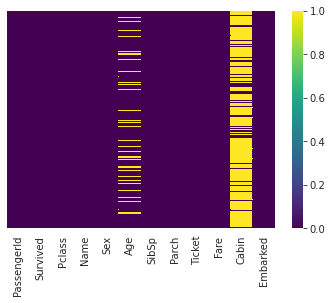

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=True,  cmap='viridis')

In [ ]:
train.drop('Cabin', axis=1, inplace= True)#https://www.w3schools.com/Python/pandas/ref_df_dropna.asp
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


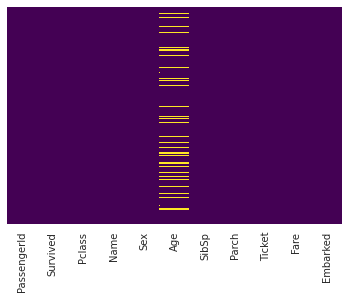

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,  cmap='viridis')

In [ ]:
train["Survived"].value_counts(normalize=False)#How many passengers survived?

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train["Survived"].value_counts(normalize=True)#How many passengers survived?

0    0.616162
1    0.383838
Name: Survived, dtype: float64

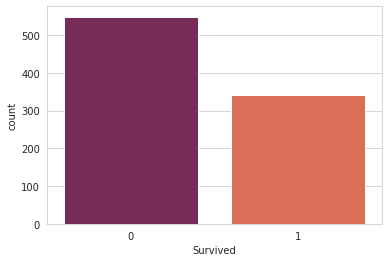

In [ ]:
sns.set_style('whitegrid')

sns.countplot(x='Survived', data=train,palette="rocket")

In [1]:
train.dropna(inplace=True)
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

NameError: ignored

In [ ]:
train.groupby(["Pclass"])["Survived"].mean().to_frame()# percentage of Pclass survived

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


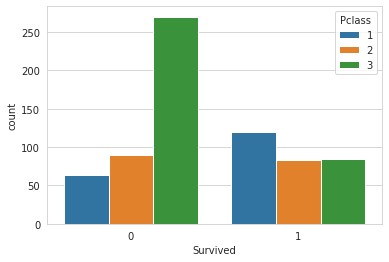

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)# Pclass3 ,24% survived ,47% in Pclass 2..

We see that 62% of passengers in class 1 were survived but this amount is reduced to 47% for class 2....

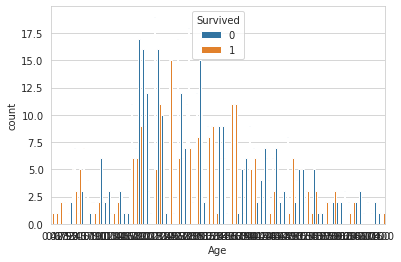

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Age', hue='Survived', data=train)# we have to 
#fix the graph make it visable,see blow

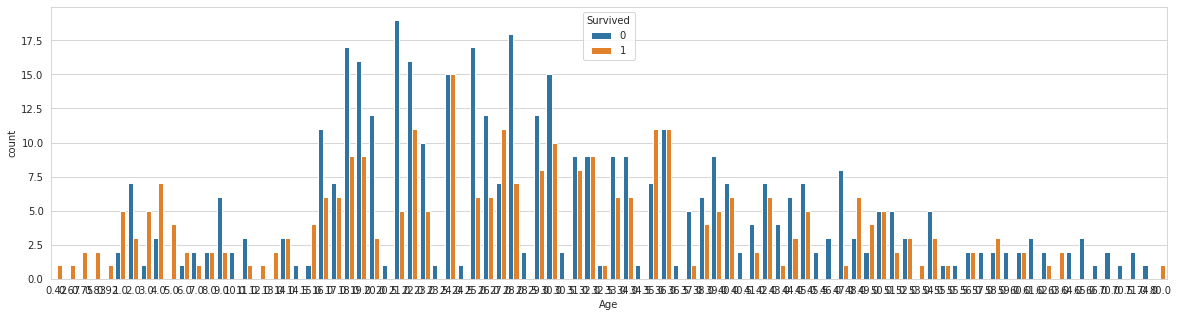

In [ ]:
#resizing the plot
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.countplot(x='Age', hue='Survived', data=train)

In [ ]:
def bar_chart_stacked(dataset,feature,stacked=True):
  survived=train[train["Survived"]==1][feature].value_counts()
  dead=train[train["Survived"]==0][feature].value_counts()   
  df_survived_dead=pd.DataFrame([survived,dead])  
  df_survived_dead.index=["passengers survived","passengers died"]   
  df_survived_dead.plot(kind="bar",stacked=stacked,figsize=(8,5))

In [ ]:
train.groupby(["Pclass"])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


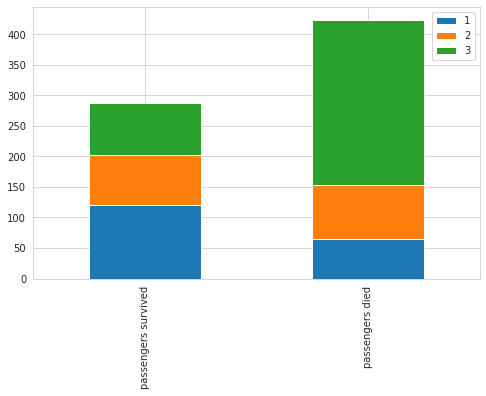

In [ ]:
bar_chart_stacked(train,"Pclass")

We see that 62% of passengers in class 1 were survived but this amount is reduced to 47% for class 2 and only 24% of passengers in class 3 were survived.On the other words the percentage of survived passengers in class 1 is 2 times bigger than the percentage of died passengers in this class.But in class 2 the percentage of survived people and died people is almost equal and for class 3 the percentage of died people is three times bigger than survived one.

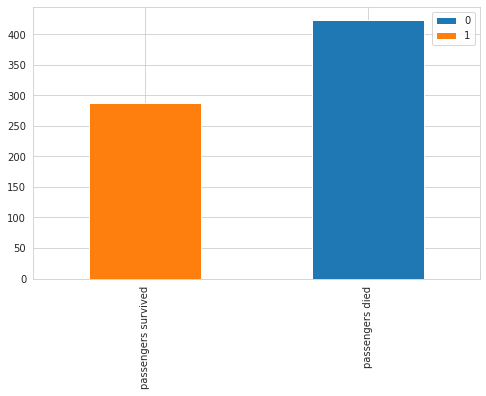

In [ ]:
bar_chart_stacked(train,"Survived")

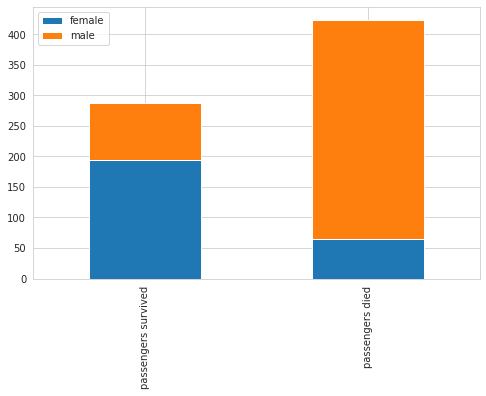

In [ ]:
bar_chart_stacked(train,"Sex")#compare the survived  and dead passengers counts on gender

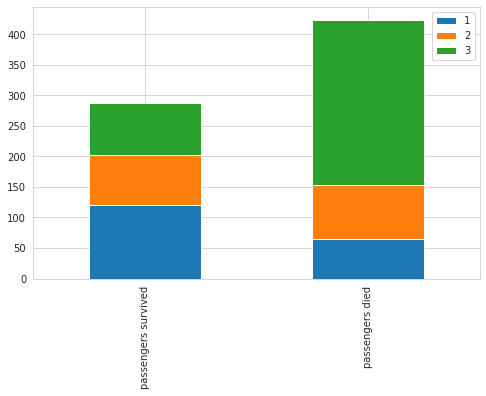

In [ ]:
bar_chart_stacked(train,"Pclass")

In [ ]:
def bar_chart_compare(dataset,feature1,feature2=None):
    plt.figure(figsize=(8,5))
    plt.title("survived rate by sex and pclass")
    g=sns.barplot(x=feature1,y="Survived",hue=feature2,data=dataset).set 

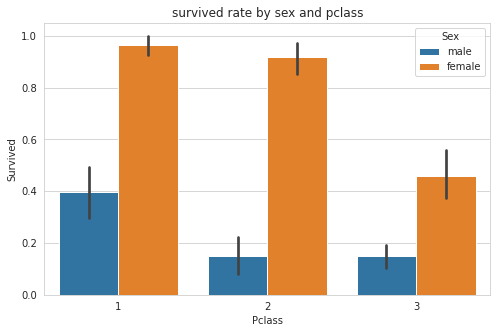

In [ ]:
bar_chart_compare(train,"Pclass","Sex")

We see that the number of men and women who were survived is decreasing according to class.In addition,men and women in class 1 had a significantly higher chance of survival if they bought class 1 tickets.

In [ ]:
#https://www.ritchieng.com/pandas-creating-dummy-variables/
#Creating Dummy Variables
#sex = pd.get_dummies(train['Sex'], drop_first=True)
#embark = pd.get_dummies(train['Embarked'], drop_first=True)

# create dummy variables for multiple categories
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)#drop_first = reducing the
# extra column created during dummy variable creation.

# this drops original Sex and Embarked columns
# and creates dummy variables
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
train.Embarked.value_counts()# as we seethere is only 3 uniqe values

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,0,1,0
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


In [ ]:
train = pd.concat([train, sex, embark],axis=1)
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1,1,0,1,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1,1,0,1,1,0,1,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1,1,0,1,1,0,1,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1,0,0,1,0,0,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0,0,0,0,0,0,0,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1,0,0,1,0,0,1,0,0,1


# Data Cleaning and Data Pre - Processing

## Class


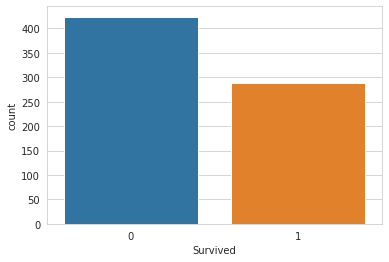

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

## Survived

In [ ]:
#sns.set_style('whitegrid')
#sns.countplot(x='Survived', hue='Sex', data=train)

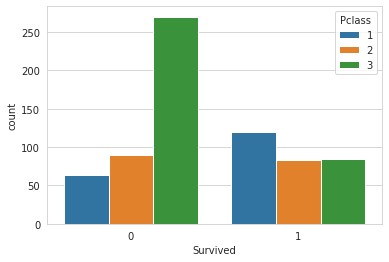

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

## Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


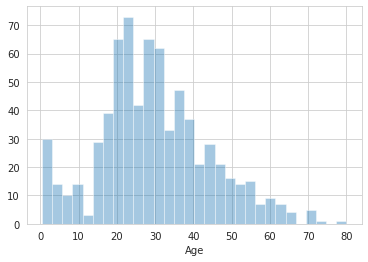

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30)

## Siblings

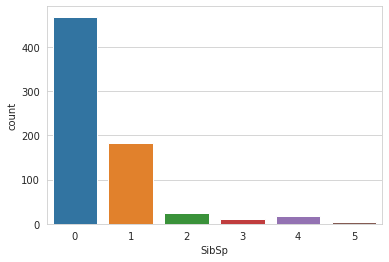

In [ ]:
sns.countplot(x='SibSp',data=train)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,1,0,1


# Model building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

ValueError: ignored

In [ ]:
predict = logmodel.predict(X_test)

NotFittedError: ignored

In [ ]:
predict

## Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

# There are four ways to check if the predictions are right or wrong:


TN / True Negative: the case was negative and predicted negative

TP / True Positive: the case was positive and predicted positive

FN / False Negative: the case was positive but predicted negative

FP / False Positive: the case was negative but predicted positive
Precision — **







# What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

# Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

### Recall — What percent of the positive cases did you catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

F1 score — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

## Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))


[[105  23]
 [ 26  60]]


<img src="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816">
<h4>Total of 713 cases 30% of the test sett  is ,  214=105+60+26+23</h4>

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

#                                          The ROC Curve

The receiver operating characteristic (ROC) curve is frequently used for evaluating the performance of binary classification algorithms. It provides a graphical representation of a classifier’s performance, rather than a single value like most other metrics.

First, let’s establish that in binary classification, there are four possible outcomes for a test prediction: true positive, false positive, true negative, and false negative.

AUC

While it is useful to visualize a classifier’s ROC curve, in many cases we can boil this information down to a single metric — the AUC.
AUC stands for area under the (ROC) curve. Generally, the higher the AUC score, the better a classifier performs for the given task.
Figure 2 shows that for a classifier with no predictive power (i.e., random guessing), AUC = 0.5, and for a perfect classifier, AUC = 1.0. Most classifiers will fall between 0.5 and 1.0, with the rare exception being a classifier performs worse than random guessing (AUC < 0.5).

Why use ROC Curves?

One advantage presented by ROC curves is that they aid us in finding a classification threshold that suits our specific problem.
For example, if we were evaluating an email spam classifier, we would want the false positive rate to be really, really low. We wouldn’t want someone to lose an important email to the spam filter just because our algorithm was too aggressive. We would probably even allow a fair amount of actual spam emails (true positives) through the filter just to make sure that no important emails were lost.
On the other hand, if our classifier is predicting whether someone has a terminal illness, we might be ok with a higher number of false positives (incorrectly diagnosing the illness), just to make sure that we don’t miss any true positives (people who actually have the illness).
Additionally, ROC curves and AUC scores also allow us to compare the performance of different classifiers for the same problem.


In [ ]:
from sklearn import  metrics

An ROC curve is the most commonly used way to visualize the performance of a binary classifier, and AUC is (arguably) the best way to summarize its performance in a single number. 

The Higher the AUC is your model is more accurate .

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

Observation..

# Conclusion...